In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 43.3MB/s]
100% 1.06G/1.06G [00:28<00:00, 39.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential

In [6]:
 #What are generators-->use data in batches form and load the data in ram
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/train/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
     image_size=(256,256)
)
test_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/test/',
    labels='inferred',
    label_mode='int',
    batch_size=32,
     image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# image is stored in pixels form 0-255 so we have to convert them 0-1 for better result.
def process(image,label):
    image = tensorflow.cast(image/255,tensorflow.float32)
    return image,label
train_dataset = train_dataset.map(process)
test_dataset = test_dataset.map(process)

In [8]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
callbackss = EarlyStopping(
    monitor='val_loss',
    min_delta=0.000001,
    patience=2,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights = False

)

In [15]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset,callbacks=callbackss)

Epoch 1/10
625/625 [==============================] - 67s 107ms/step - loss: 0.1078 - accuracy: 0.9616 - val_loss: 0.9736 - val_accuracy: 0.7690
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0782 - accuracy: 0.9703 - val_loss: 1.4107 - val_accuracy: 0.7366
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0624 - accuracy: 0.9793 - val_loss: 0.8059 - val_accuracy: 0.8162
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.0511 - accuracy: 0.9845 - val_loss: 0.7155 - val_accuracy: 0.8088
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 0.9264 - val_accuracy: 0.8148
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 1.1945 - val_accuracy: 0.8054
Epoch 6: early stopping


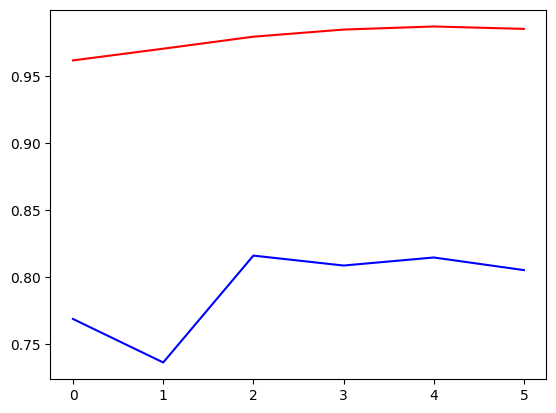

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='trainig')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.show()

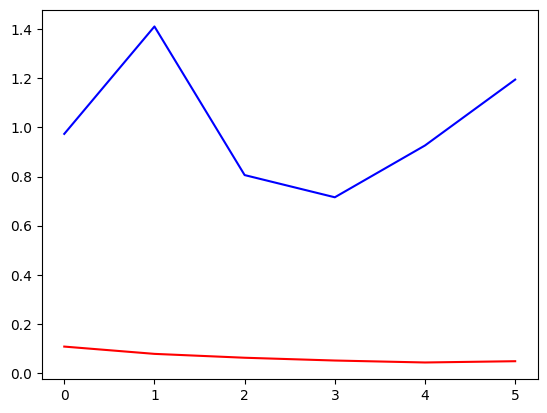

In [17]:
plt.plot(history.history['loss'],color='red',label='trainig')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.show()

In [31]:
import cv2

In [32]:
test_img = cv2.imread('/content/dog.jpeg')

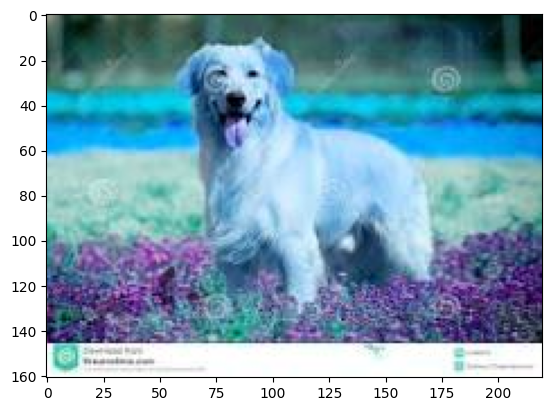

In [33]:
plt.imshow(test_img)
plt.show()

In [34]:
test_img.shape

(161, 220, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256))

In [36]:
test_input = test_img.reshape((1,256,256,3))

In [37]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)

In [42]:
test_img2 = cv2.imread('/content/cats.jpeg')

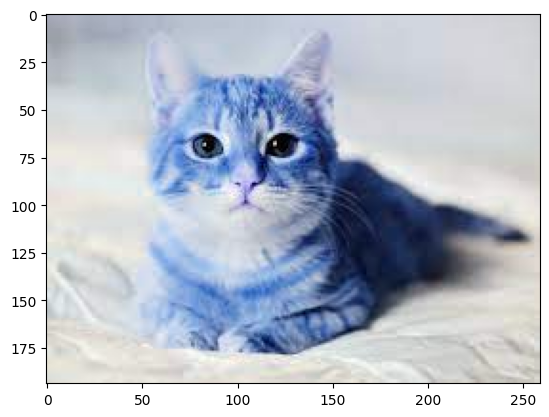

In [43]:
plt.imshow(test_img2)
plt.show()

In [44]:
test_img2.shape

(194, 259, 3)

In [45]:
test_img2 = cv2.resize(test_img2,(256,256))

In [46]:
test_input2 = test_img2.reshape((1,256,256,3))

In [47]:
model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)